# FLUJO DE TRABAJO

In [14]:
#descargamos las librerias que vamos a usar y las configuraciones
import pandas as pd
import numpy as np
import string

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import nltk
import itertools
from nltk.tokenize import sent_tokenize, word_tokenize

#Esto sirve para configurar NLTK. La primera vez puede tardar un poco
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Luigi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Luigi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
dataset = pd.read_json(r'C:\Users\Luigi\Documents\02.Proj_Amazon-NLP\dataset_es_dev.json',lines=True)

# Analisis 1 Estrella

In [61]:
# Importamos esta libreria que nos permite reemplzar caracteres
import re

# Importamos la función que nos permite Stemmizar de nltk y definimos el stemmer
from nltk.stem import SnowballStemmer
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [62]:
stopwords = nltk.corpus.stopwords.words('spanish')
stopwords = [palabra for palabra in stopwords if 'not' not in palabra]
#stopwords

In [60]:
dataset_stars_1= dataset[dataset.stars==1]
dataset1 = dataset_stars_1.iloc[:,[4,5,3]]
dataset1.head()

,review_body,review_title,stars
0,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,1
1,No he recibido el pedido no la devolución,No lo he recibido,1
2,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,1
3,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,1
4,No me gusta su olor a viejo y aspecto malo,No me gusta,1


In [63]:
# Recorremos todos los titulos y le vamos aplicando la Normalizacion y luega el Stemming a cada uno
review_list=[]
simb=["!",".",",","no","si","...",")","(","1","2","3","4","5","6","7","8","9","0"]
Bolsa1=[]
for review in dataset_stars_1.review_title:
    # Vamos a reemplzar los caracteres que no sean leras por espacios
    #review=re.sub(","," ",str(review))#borra los espacios y las tiles
    # Pasamos todo a minúsculas
    review=review.lower()
    # Tokenizamos para separar las palabras del titular
    review=nltk.word_tokenize(review)
    # Eliminamos las palabras de menos de 3 letras
    #dataset = [palabra for palabra in dataset if len(palabra)>2]
    # Sacamos las Stopwords
    review = [palabra for palabra in review if not palabra in stopwords if not palabra in simb]
    
    ## Hasta acá Normalizamos, ahora a stemmizar
    
    # Aplicamos la funcion para buscar la raiz de las palabras
    review=[stemmer.stem(palabra) for palabra in review]

    Bolsa1.append(review)
    # Por ultimo volvemos a unir el titular
    review=" ".join(review)
    
    # Vamos armando una lista con todos los titulares
    review_list.append(review)
    #dataset["titular_normalizado"] = titular_list

In [64]:
Flat_list_1 = [item for t in Bolsa1 for item in t]
Flat_list_1[0:5]

['mala', 'compra', 'recibido', 'aprieta', 'bien']

In [71]:
freq1 = nltk.FreqDist(Flat_list_1)
freq1

FreqDist({'calidad': 55, 'mala': 53, 'producto': 52, 'mal': 37, 'funciona': 27, 'roto': 23, 'malo': 21, 'nunca': 20, 'llegado': 20, 'comprar': 18, ...})

In [72]:
import re, string

def remove_punctuation ( lista1 ):
  return re.sub('[%s]' % re.escape(string.punctuation), ' ', text)

df_freq = pd.DataFrame(list(freq1.items()), columns = ["Word", "Frecuency"])
df_freq.sort_values('Frecuency',ascending=False, inplace = True)
df_freq.head()

,Word,Frecuency
44,calidad,55
0,mala,53
17,producto,52
71,mal,37
47,funciona,27


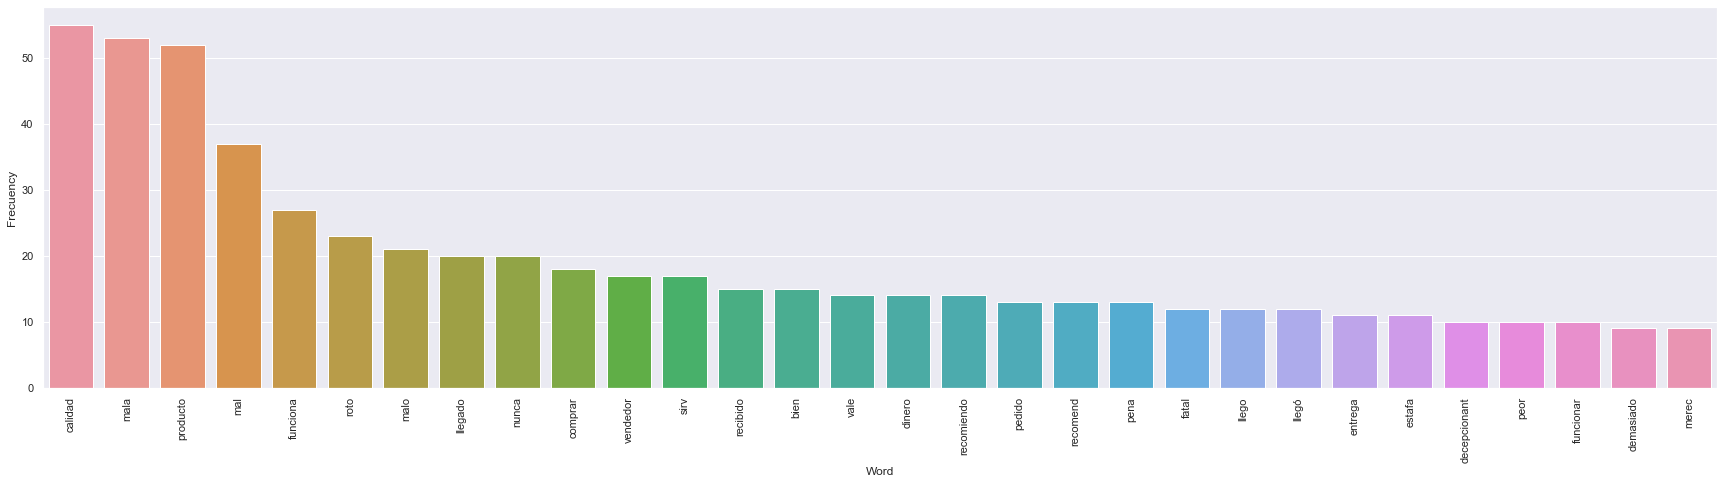

In [73]:
plt.figure(figsize = (30,7))
plot = sns.barplot(x  = df_freq.iloc[:30].Word, y = df_freq.iloc[:30].Frecuency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()